# Entregável 3 de Visão Computacional e Robótica


**Alunas:** Gabriela Mtu e Gabriella Cukier

Nesta semana vamos trabalhar com um assunto extremamente atual: reconhecimento de objetos e rastreamento


Referências:

[https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/](https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/)

[https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/](https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/)

[https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/](https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/)

**Obs.:** Os arquivos correspondentes a essa atividade estarão disponíveis no git dentro da pasta Entrega3

### 1. Ponto de fuga

Robôs que trabalham dentro de prédios precisam saber seguir corredores.

Uma das maneiras de fazer isso é o robô alinhar o centro de sua câmera ao ponto de fuga do corredor, para que sua trajetória seja aproximadamente paralela às paredes do mesmo.


O ponto de fuga é aquele para o qual as retas paralelas parecem convergir

Dada a seguinte imagem de um corredor:

![Imagem do corredor](ponto_fuga.png)

Podemos traçar as linhas geradas pela perspectiva, seu ponto de encontro será o ponto de fuga.



### Revisão: reta passando por dois pontos

![Encontro de duas retas](retas.png)


Seja o ponto $A:(a_x, a_y)$ e o ponto $B:(b_x, b_y)$

Queremos encontrar uma reta $r: y = mx + h$ que passa por $A$ e $B$, em que $m$ é o *coeficiente angular* e $h$ é o intercepto ou coeficiente linear da reta.

Temos que:

$m = \frac{\Delta_y}{\Delta_x} = \frac{b_y - a_y}{b_x - a_x}$

Uma vez encontrado o valor de $m$, a substituição a seguir permite encontrar a equação da reta:

$m = \frac{y - a_y}{x - a_x}$

$mx - ma_x = y - a_y$

$mx = y - a_y + ma_x$

$y = mx -ma_x + a_y$

$h = a_y - ma_x$


$y = mx - ma_x + a_y$

### Interseção de duas retas

Temos que na interseção as duas retas se encontram num ponto $(x_i, y_i)$

Sejam as retas $r1: y = m1x + h1$ e $r2: y = m2x + h2$

Vamos encontrar o ponto $x_i$ em que os valores de $y_i$ serão iguais:

$m1x_i + h1 = m2x_i + h2$

$(m1 - m2)x_i = h2 - h1$

$x_i = \frac{h2 - h1}{m1 - m2}$

$y_i = m1x_i + h1$

**Dados de teste:**

Caso precise testar seu código, você pode conferir com estes valores. As retas definidas por pontos $r1: (P_1, P_2)$ e $r2: (Q_1, Q_2)$, para os valores:

```python

p1 = (3.0, 2.5)
p2 = (4.0, 0.6)
q1 = (1.0, 2.4)
q2 = (0.6, 1.1)
```

Encontram-se no ponto `(1.7572 4.8611)`


Pede-se: 

* A partir do ponto para onde convergem as linhas do corredor, marque o ponto de fuga no vídeo.  Você precisa mostrar as retas que vão convergir.


**Sugestão:** 

A partir do coeficiente angular, selecionar uma reta mais à esquerda e uma mais à direita para encontrar a interseção.

Lembre-se de que na OpenCV o eixo y fica **para baixo**, por isso os coeficientes angulares se comportam como na figura abaixo:

![Valores de coeficiente angular](coeficientes_m.png)

Lembre-se de que, no espaço de cores HSV, o vermelho se encontra no início e no fim da escala do componente H. Se você estiver filtrando vermelho em um só dos extremos pode não ter bons resultados

Vídeos para teste:


[Vídeo 1](https://www.dropbox.com/s/pgm2zghifdyqjeb/VID_20200302_063445951.mp4?dl=0)

[Vídeo 2](https://www.dropbox.com/s/g64xcpx6zl1tac1/VID_20200302_063554327.mp4?dl=0)

[Vídeo 3](https://www.dropbox.com/s/0qa2culfrf4qpge/VID_20200302_063719050.mp4?dl=0)

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

__author__      = "Matheus Dib, Fabio de Miranda"

import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import math
import matplotlib.cm as cm
import numpy as np

# Parameters to use when opening the webcam.
cap = cv2.VideoCapture('LinhasSala.mp4')
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

lower = 0
upper = 1


def eq_reta(P1, P2):
    x1=P1[0]
    y1=P1[1]
    x2=P2[0]
    y2=P2[1]
    dx=x2-x1
    dy=y2-y1
    #coeficiente angular
    if dx != 0:
        m=dy/dx
    else:
        m=0
    #coeficiente linear
    h=y1-(m*x1)
    return (m,h)

def intersecao_retas(reta1,reta2):
    m1=reta1[0]
    m2=reta2[0]
    h1=reta1[1]
    h2=reta2[1]

    xi=int((h2-h1)/(m1-m2))
    yi= int((m1*xi)+h1)

    return (xi,yi)


def calcula_m(x2,x1,y2,y1):
    dx=(x2-x1)
    dy=(y2-y1)    
                
    if dx!=0:
        return dy/dx

def calcula_h(x,y,m):
    return y - m * x



print("Press q to QUIT")

# Returns an image containing the borders of the image
# sigma is how far from the median we are setting the thresholds
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

def comp(a,b):
    if a[1] > b[1]:
        return -1
    elif a[1] == b[1]:
        return 0
    else:
        return 1



 
while(True):
    ret, frame = cap.read()

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
    # A gaussian blur to get rid of the noise in the image
    blur = cv2.GaussianBlur(gray,(5,5),0)
    # Detect the edges present in the image
    bordas = auto_canny(blur)
    # Obtains a version of the edges image where we can draw in color
    bordas_color = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)

    #mascaras para filtrar o branco
    masks = cv2.inRange(gray, 240, 255)
    nmask=cv2.bitwise_not(masks)


    imagem = cv2.bitwise_or(frame, frame, mask=masks)
    imgcon= cv2.bitwise_and(gray, gray, mask=nmask)
    
    imagem2 = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    #final=cv2.bitwise_or(imagem,imagem2)


    lines=[]
    lines = cv2.HoughLines(imagem2, 1, np.pi/180, 200)
    
    m1 = 0
    h1 = 0
    m2 = 0
    h2 = 0

    linha1 = False
    linha2 = False

    if lines is not None:
        for linha in lines:
            for r,theta in linha: 
                a = np.cos(theta) 
                b = np.sin(theta)  
                x0 = a*r 
                y0 = b*r 
                x1 = int(x0 + 1000*(-b))  
                y1 = int(y0 + 1000*(a))  
                x2 = int(x0 - 1000*(-b))  
                y2 = int(y0 - 1000*(a)) 
                
                m=calcula_m(x2,x1,y2,y1)

                if m < -0.3 and m > -3.3:
                    
                    if not linha1:
                        linha1=True
                        m1 = m
                        h1=calcula_h(x1,y1,m)
                        cv2.line(imagem,(x1,y1), (x2,y2), (0,255,0),2)

                elif m > 0.3 and m < 3.3:
                    if not linha2:
                        linha2 = True
                        m2 = m
                        h2 =calcula_h(x1,y1,m)
                        cv2.line(imagem,(x1,y1), (x2,y2), (0,255,0),2)


        if (m1-m2)!=0:    
            intersecao=intersecao_retas((m1,h1),(m2,h2))                
        cv2.circle(imagem,(intersecao[0],intersecao[1]), 15, (100,50,0), -1)


    cv2.imshow('Final', imagem)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


VideoCapture.release()
cv2.destroyAllWindows()





### 2. Executar os dois exemplos

Há três exemplos: `mobilenet_detection`, `yolov3_detection` e `tracking`.

Os dois primeiros são reconhecedores de objetos, e o último é de rastreamento.


Um dos arquivos abaixo precisa ser baixado e salvo nas pasta  `yolov3_detection/yolov3-coco` .

[https://www.dropbox.com/s/013ogt2bhwfzxwb/yolov3.weights?dl=0](https://www.dropbox.com/s/013ogt2bhwfzxwb/yolov3.weights?dl=0) ou [https://pjreddie.com/media/files/yolov3.weights](https://pjreddie.com/media/files/yolov3.weights)

*Atenção:* Vamos rodar a Yolo só por importância "histórica"

Depois de rodar o demos, estude o notebook  [Demo_Imagenet.ipynb](Demo_Imagenet.ipynb)

## 3. Identificar objeto

Use o projeto `mobilenet_detection` para basear seu código. 

Neste projeto, escolha uma categoria de objetos que o reconhecedor reconhece. Diga aqui qual foi sua escolha

**Resp.:** A categoria escolhida é pessoa.

Implemente a seguinte funcionalidade: sempre que o objeto identificado em (2) estiver presente por mais que 5 frames seguidos, desenhe um retângulo fixo ao redor dele. 

**Obs.:** Validação no video TesteEx1 em Entrega3

## 4. Simulador

 Rode o simulador do Turtlebot (use o Waffle).  Veja o guia em [../guides/simulador_ros.md](https://github.com/Insper/robot20/blob/master/guides/simulador_ros.md)
 
 Documente aqui as linhas necessárias para teleop e para abrir o Rviz
 
 Faça um screenshot do seu simulação em execução

Para o controle do robô no simulador (teleop), usa-se o seguinte comando no terminal:

- roslaunch turtlebot3_teleop turtlebot3_teleop_key.launch


E, para o monitoramento dos dados dos sensores do robô é usado o Rviz, o qual é executado com o seguinte comando no terminal:

- roslaunch turtlebot3_gazebo turtlebot3_gazebo_rviz.launch

file:///home/borg/Pictures/Screenshot%20from%202020-03-11%2008-14-25.png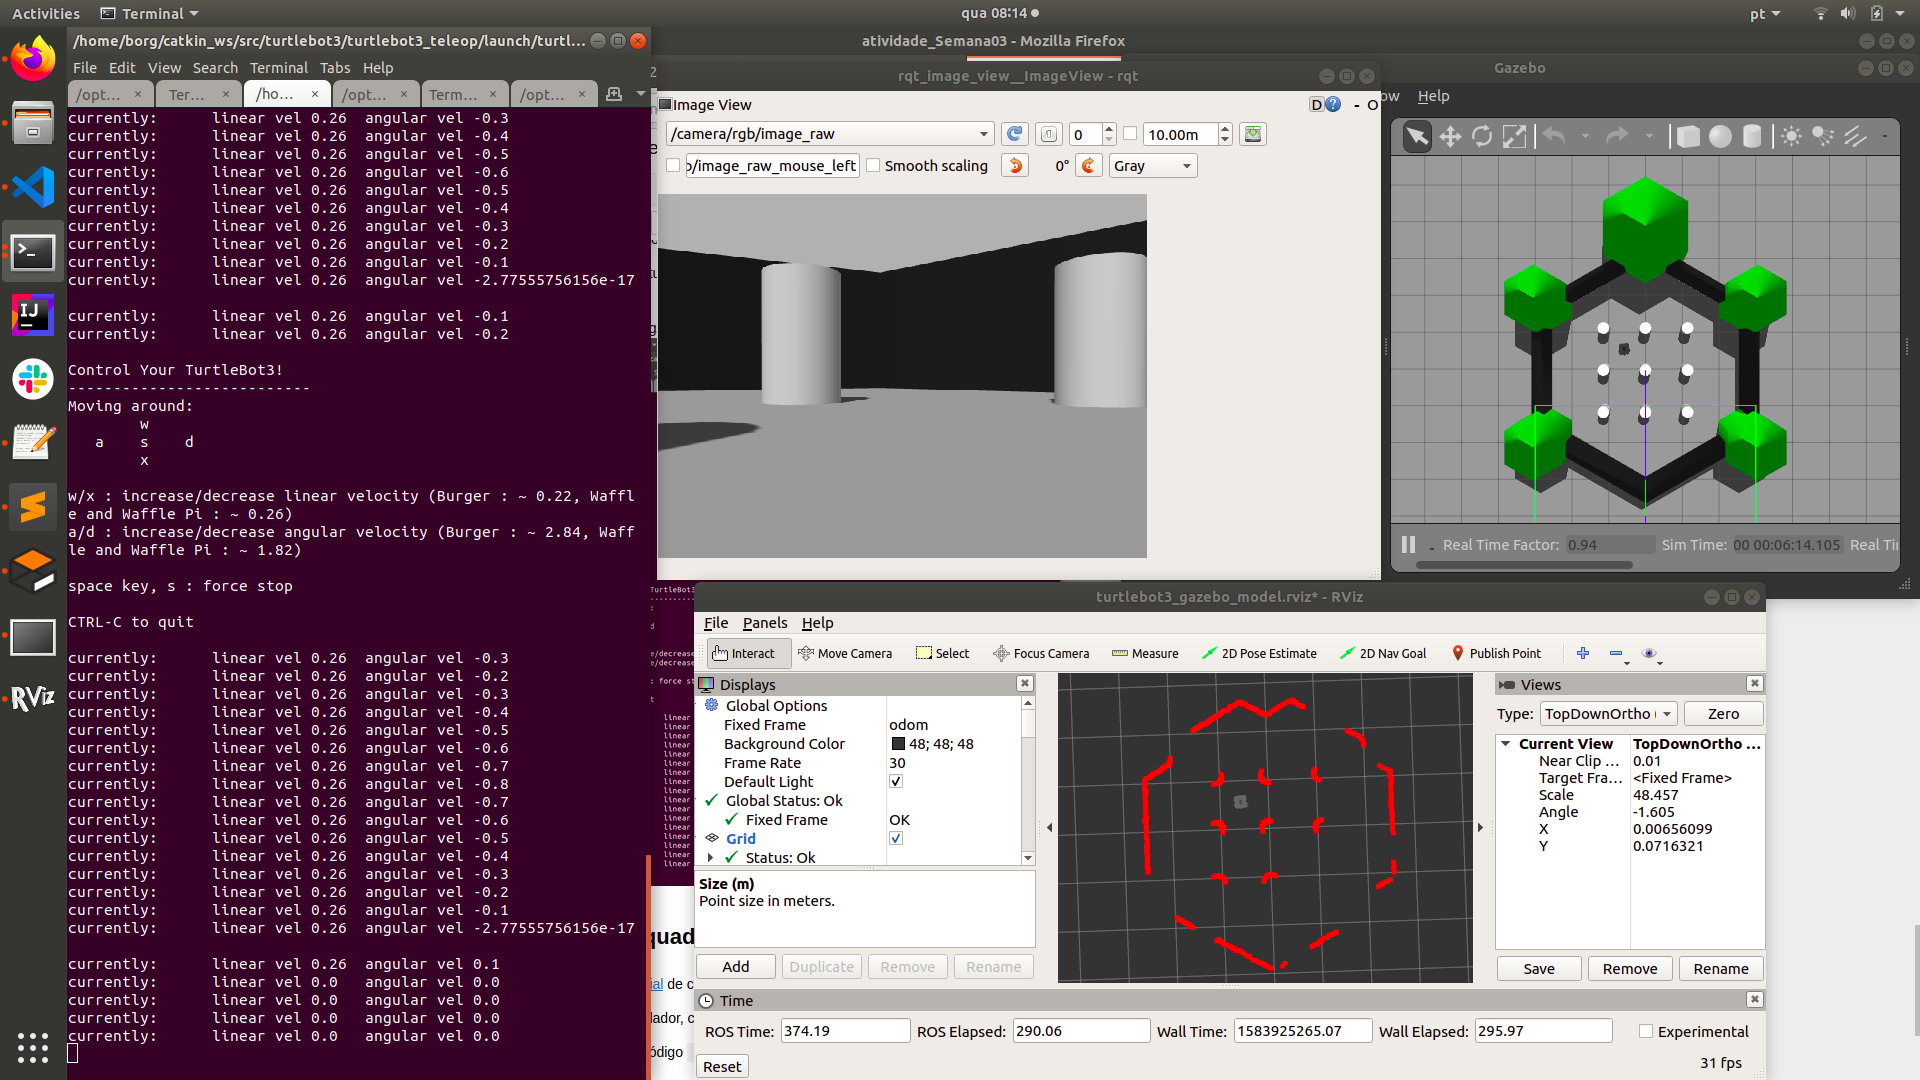

## 5. Robô quadrado

Faça [este tutorial](../guides/projeto_rospython.md) de como criar um projeto Python que comanda o robô simulado.

Usando o simulador, crie um código que faça o robô fazer uma trajetória que aproxima um quadrado.

Baseie-se no código `roda.py`, construído durante o tutorial 

In [ ]:
#! /usr/bin/env python
# -*- coding:utf-8 -*-

import rospy
from geometry_msgs.msg import Twist, Vector3

#v = .50  # Velocidade linear
#w = .5  # Velocidade angular

if __name__ == "__main__":

    rospy.init_node("roda_exemplo")
    pub = rospy.Publisher("cmd_vel", Twist, queue_size=3)

    try:
        while not rospy.is_shutdown():



            vel0 = Twist(Vector3(0.2,0,0), Vector3(0,0,0))
            pub.publish(vel0)
            rospy.sleep(3.0)


            vel1 = Twist(Vector3(0,0,0), Vector3(0,0,0))
            pub.publish(vel1)
            rospy.sleep(3.0)

            vel2 = Twist(Vector3(0,0,0), Vector3(0,0,0.5))
            pub.publish(vel2)
            rospy.sleep(3.0)

            #vel3 = Twist(Vector3(0,0,0), Vector3(0,0,0))
            #pub.publish(vel3)
            #rospy.sleep(2.0)


    except rospy.ROSInterruptException:
        print("Ocorreu uma exceção com o rospy")



**Obs.:** Validação no video Ex05-roda em Entrega3

## 6. Robô indeciso

Usando o simulador e o LIDAR simulado, faça um robô avançar quando o obstáculo bem à sua frente estiver a menos de 1.0m e recuar quando estiver a mais de 1.02 m.

Baseie-se no código `le_scan.py` e `roda.py`, desenvolvidos [durante o tutorial](https://github.com/Insper/robot20/blob/master/guides/projeto_rospython.md)

In [ ]:
#! /usr/bin/env python
# -*- coding:utf-8 -*-

import rospy
import numpy as np
from geometry_msgs.msg import Twist, Vector3
from sensor_msgs.msg import LaserScan


dist=[]

def scaneou(dado):
	#global dist
	d = (np.array(dado.ranges)[0]).round(decimals=2)
	dist.append(d)


	print("Faixa valida: ", dado.range_min , " - ", dado.range_max )
	print("Leituras:")
	print(np.array(dado.ranges).round(decimals=2))
	#print("Intensities")
	#print(np.array(dado.intensities).round(decimals=2))

	


if __name__=="__main__":

	rospy.init_node("le_scan")

	velocidade_saida = rospy.Publisher("/cmd_vel", Twist, queue_size = 3 )
	recebe_scan = rospy.Subscriber("/scan", LaserScan, scaneou)



	while not rospy.is_shutdown():
		#print("Oeee")

		p=len(dist)-1
		if p>0:
			print(dist)
			print(p)
			if dist[p] <= 0.98:
				para = Twist(Vector3(0.0, 0, 0), Vector3(0, 0, 0))
				velocidade_saida.publish(para)
				rospy.sleep(1)

				velocidade = Twist(Vector3(-0.2, 0, 0), Vector3(0, 0, 0))
				velocidade_saida.publish(velocidade)
				rospy.sleep(1)

			elif dist[p] > 1.2:
				para = Twist(Vector3(0.0, 0, 0), Vector3(0, 0, 0))
				velocidade_saida.publish(para)
				rospy.sleep(1)

				velocidade = Twist(Vector3(0.2, 0, 0), Vector3(0, 0, 0))
				velocidade_saida.publish(velocidade)
				rospy.sleep(1)







**Obs.:** Validação no video ex06-webm em Entrega3